# Image Processing 
## Project - Part One

### Assigned by:



#### Auxiliary libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

## The functions

### zero_padding





In [2]:
def zero_padding(img, filter_matrix):
    """
    The function gets image and filter.   
    The function add zeros to the borders of the data as concatenated values to the image and return her.


    :param img:                       Image
    :type img:                           matrix of integers between 0 - 255
    :param filter_matrix:           The filter
    :type filter_matrix:              matrix 

    :return:                               Image with padding of the value zero
    :rtype:                                matrix of integers between 0 - 255 
    """
    
    height = img.shape[0]
    width = img.shape[1]
    height_filter = len(filter_matrix)
    width_filter = len(filter_matrix[1])
    extra_width = (int)(width_filter/2)
    extra_height = (int)(height_filter/2)
    
    if (len(img.shape)!=2 or extra_width < 0 or extra_height < 0):
        return None
    
    #create new matrix of zero
    new_matrix = np.zeros((height+extra_height*2, width+extra_width*2))
    
    # insert the image to the center of the matrix
    new_matrix [extra_height:height+extra_height,extra_width:width+extra_width] = img       
    return new_matrix


### extend_padding





In [3]:
def extend_padding(img, filter_matrix):
    """
    The function gets image and filter.   
    The function add the last values from the image borders to the new extra borders.


    :param img:                       Image
    :type img:                           matrix of integers between 0 - 255
    :param filter_matrix:           The filter
    :type filter_matrix:              matrix 

    :return:                               Image with padding of the last values of the borders of the image
    :rtype:                                 matrix of integers between 0 - 255 
    """
    height = img.shape[0]
    width = img.shape[1]
    height_filter = len(filter_matrix)
    width_filter = len(filter_matrix[1])
    extra_width = (int)(width_filter/2)
    extra_height = (int)(height_filter/2)
    if (len(img.shape)!=2 or extra_width < 0 or extra_height < 0):
        return None
    
    #Create new matrix of zero
    new_matrix = np.zeros((height+extra_height*2, width+extra_width*2))
    
    #Adding values to the corners
    for h in range(extra_height):
        for w in range(extra_width):                                                                                  
            new_matrix[h][w] =  img[0][0]
            new_matrix[height+extra_height+h][width+extra_width+w] =  img[height-1][width-1]
            new_matrix[h][width+extra_width+w] =  img[0][width-1]
            new_matrix[height+extra_height+h][w] =  img[height-1][0]
    
    #Adding values to the vertical image borders
    for h in range(extra_height):                                                                                   
        for w in range(width):                                                                                            
            new_matrix[h][extra_width+w] =  img[0][w]
            new_matrix[height+extra_height+h][extra_width+w] =  img[height-1][w]

    #Adding values to the Horizontal image borders          
    for h in range(height):                                                                                           
        for w in range(extra_width):                                                                                    
            new_matrix[h+extra_height][w] =  img[h][0]
            new_matrix[extra_height+h][width+extra_width+w] =  img[h][width-1]
   
    #insert the image to the center of the matrix  
    new_matrix [extra_height:height+extra_height,extra_width:width+extra_width] = img   
                                                                                                                                                
    return new_matrix


### filter

 


In [4]:
def filter(img,  filter_matrix):
    """
    The function gets image and filter.     
    The function filters the image according to the filter it received and return her.


    :param img:                       Image
    :type img:                           matrix of integers between 0 - 255
    :param filter_matrix:           The filter
    :type filter_matrix:              matrix 
    

    :return:                               The image after filtering
    :rtype:                                matrix of integers between 0 - 255     
    """
   
    height = img.shape[0]
    width = img.shape[1]
    height_filter = len(filter_matrix)
    width_filter = len(filter_matrix[1])
    extra_width = (int)(width_filter/2)
    extra_height = (int)(height_filter/2)
    
    if (len(img.shape)!=2 or extra_width < 0 or extra_height < 0):
        return None

    #Adding  extend padding
    padd_matrix =  extend_padding(img, filter_matrix)                                       

    new_matrix = np.zeros((height+extra_height*2,width+extra_width*2)) 
    
    #Loop that runs on image without the padding
    for  i in range(extra_height,height+extra_height):                                        
        for j in range(extra_width,width+extra_width):
            
            #Inner loop that runs for each pixel with filter
            for h in range(height_filter):                                                                   
                for w in range(width_filter):                                                                                
                    new_value = new_matrix[i][j] + (filter_matrix[h][w] * padd_matrix [ i - extra_height+h][ j - extra_width+w]) 
                    
                    #Verify that the values of the matrix are between 0-255 
                    if (new_value>255):                                                                       
                        new_value = 255                                                                                 
                    elif (new_value<0):
                        new_value = 0
                    new_matrix[i][j] =  new_value
             
    new_matrix = padd_matrix - new_matrix
    return new_matrix [extra_height:height+extra_height,extra_width:width+extra_width]

## Checking the functions

* Upload the square image


In [5]:
image = cv2.imread("flower.jpg",0)

* Large filter for the example

In [6]:
large_filter = np.ones((200,200))

* Checking the zero_padding function

In [7]:
new_img_zero = zero_padding(image,large_filter)

* Checking the extend_padding function

In [8]:
new_img_extend = extend_padding(image,large_filter)

##### View image with different padding

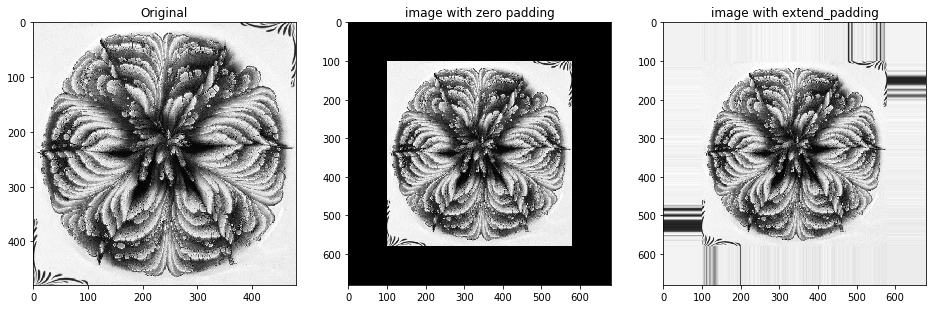

In [9]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.title('Original')
plt.imshow(image,cmap="gray")

plt.subplot(132)
plt.title('image with zero padding')
plt.imshow(new_img_zero,cmap="gray")

plt.subplot(133)
plt.title('image with extend_padding')
plt.imshow(new_img_extend,cmap="gray")

* Checking the filter function with laplacian

In [10]:
laplacian = [[0,-1,0],
            [-1,4,-1],
            [0,-1,0]]

* Laplasian filter setting

In [11]:
laplacian_img_filter = filter(image,laplacian)

* Checking the filter with a color image (error)

In [12]:
image_error = cv2.imread("flower.jpg")

print(filter(image_error,  laplacian))

None


* gaussian filter setting

In [13]:
gaussian = [[(1/273),(4/273),(7/273),(4/273),(1/273)],
            [(4/273),(16/273),(26/273),(16/273),(4/273)],
            [(7/273),(26/273),(41/273),(26/273),(7/273)],
            [(4/273),(16/273),(26/273),(16/273),(4/273)],
            [(1/273),(4/273),(7/273),(4/273),(1/273)]]

* Checking the filter function with gaussian

In [14]:
gaussian_img_filter = filter(image, gaussian)

* Gradient_dx filter setting

In [15]:
Gradient_dx = [[(-1),(0),(1)],
            [(-1),(0),(1)],
            [(-1),(0),(1)],
            [(-1),(0),(1)],]

* Checking the filter function with Gradient_dx

In [16]:
gradien_img_filter = filter(image,Gradient_dx)

##### View image with different filters

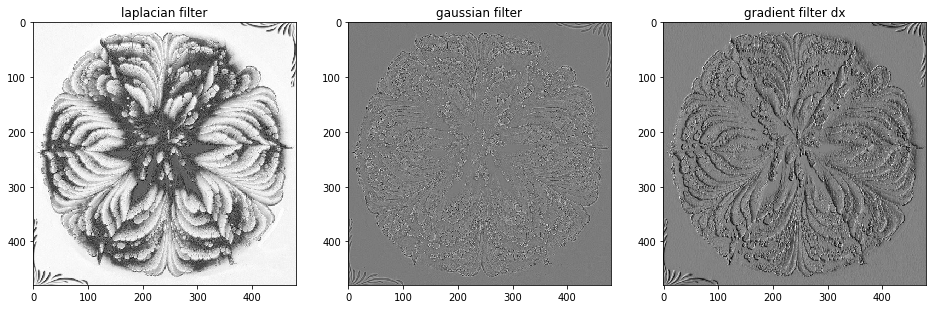

In [17]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.title('laplacian filter')
plt.imshow(laplacian_img_filter,cmap="gray")

plt.subplot(132)
plt.title('gaussian filter')
plt.imshow(gaussian_img_filter,cmap="gray")

plt.subplot(133)
plt.title('gradient filter dx')
plt.imshow(gradien_img_filter,cmap="gray")

* Upload rectangular image

In [18]:
image2 = cv2.imread("apples.jpg",0)

* Checking the zero_padding function on rectangular image

In [19]:
new_img_zero2 = zero_padding(image2, large_filter)

* Checking the extend_padding function on rectangular image

In [20]:
new_img_extend2 = extend_padding(image2,large_filter)

* Checking the filter function on rectangular image

In [21]:
new_img_filter = filter(image2,laplacian)

###### View rectangular image with filter

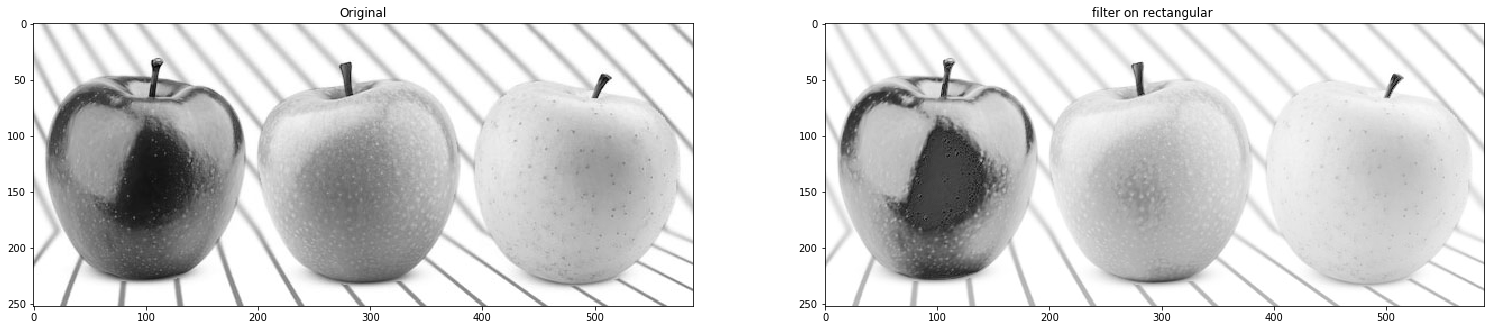

In [22]:
plt.figure(figsize=(26,26))
plt.subplot(121)
plt.title('Original')
plt.imshow(image2,cmap="gray")

plt.subplot(122)
plt.title('filter on rectangular ')
plt.imshow(new_img_filter,cmap="gray")

##### View rectangular image with different padding

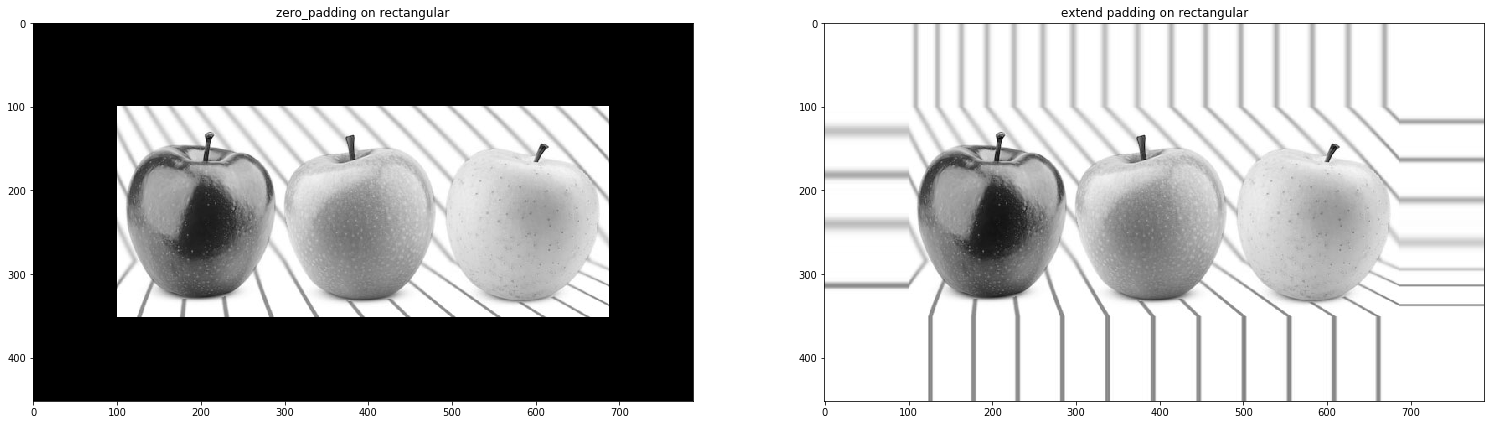

In [23]:
plt.figure(figsize=(26,26))
plt.subplot(121)
plt.title('zero_padding on rectangular')
plt.imshow(new_img_zero2,cmap="gray")

plt.subplot(122)
plt.title('extend padding on rectangular')
plt.imshow(new_img_extend2,cmap="gray")